<h1> Practice Project No.1</h1>

<b>2019 March</b>
<p>Rama, Thomas, Cameron</p>

<i> <b>NOTE: Project No.2 Starts lower down, and is marked.</b>
<p>Code commentary is #commented out# in the script boxes, and project commentary is included in italicized text such as this. (Expository)</p>
</i>

<h3>The Beginning</h3>

In [1]:
#import Panda and Numpy
import pandas as pd
import numpy as np


In [2]:
#defining the location for data and attempting to read it with panda
location = "datasets/DC_Properties.csv"
dcl_df = pd.read_csv(location, low_memory=False)

<i>Looking at the data we just loaded! Let's hope that worked! Without the command modifier 'low_memory=False' we get a memory error. The error does not prevent work from being done, but it is annoying to get an error in any case, so we have elected to run the command as such to minimize error messages.
</i>

In [3]:
dcl_df.head()
#looking at the head of our data file

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [4]:
#looking at the end of the file
dcl_df.tail(1)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
158956,158956,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,0504,-77.018232,38.872961,SW


<h3>Tepid Initial Analysis</h3>
<p><h4> Getting A Feel</h4></p>

In [5]:
#looking for duplicates in the data
dupe = dcl_df.duplicated()
dcl_df[dupe]
#there appear to be no duplicates in this data
#it is already remarkably clean


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


<i>There are no values that duplicate across all 49 columns. This is good, it makes our initial job (maybe) that much easier...
</i>

In [6]:
#looking at the data names and column types
#there are 49 unique columns present in the CSV
#The first 'Unnamed: 0' is a count-up from 0 to 158956
dcl_df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [7]:
#describe the data, looking at min/max etc
dcl_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


<h3> Ward Breakdown: What Where?</h3>

In [8]:
#trying to figure out how many homes per which ward are present
#that is, count of presence of "Ward X" in column WARD

dcl_df['WARD'].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

<i> It would appear the Wards have very comparable sales rates. Surprisingly, Ward 6 tops the chart--possiblye due to it's larger size? Not surprising is the low volume of sales in Ward 1 (which would be very expensive) and Ward 8, which is somewhat neglected.
</i>

In [9]:
dcl_df['LIVING_GBA'].groupby(dcl_df['WARD']).mean()
#attempting to display the average LIVING_GBA by ward
#does one area have more living space than an other?
#we predict a 'yes'

WARD
Ward 1     895.214028
Ward 2     860.502595
Ward 3     932.902108
Ward 4     860.575610
Ward 5    1010.261691
Ward 6     883.013510
Ward 7     793.582723
Ward 8     840.932631
Name: LIVING_GBA, dtype: float64

<i>
</i>

In [10]:
dcl_df['LIVING_GBA'].groupby(dcl_df['WARD']).median()
#mean may be skewed by a larger farmhouse in Ward 5
#so we now look at the median

WARD
Ward 1    831.0
Ward 2    752.0
Ward 3    810.0
Ward 4    740.0
Ward 5    900.0
Ward 6    781.0
Ward 7    708.0
Ward 8    766.0
Name: LIVING_GBA, dtype: float64

In [11]:
#sorting ward by most rooms of a property in that area
dcl_df['BEDRM'].groupby(dcl_df['WARD']).max()

WARD
Ward 1    20
Ward 2    19
Ward 3    16
Ward 4    24
Ward 5    14
Ward 6    12
Ward 7    12
Ward 8    13
Name: BEDRM, dtype: int64

In [12]:
#sorting ward by median price
dcl_df['PRICE'].groupby(dcl_df['WARD']).median()

WARD
Ward 1    461500.0
Ward 2    475000.0
Ward 3    600000.0
Ward 4    428000.0
Ward 5    360710.0
Ward 6    469900.0
Ward 7    200000.0
Ward 8    194900.0
Name: PRICE, dtype: float64

In [13]:
#ward by maximum price (and minimum)

dcl_df['PRICE'].groupby(dcl_df['WARD']).max()

WARD
Ward 1     12780000.0
Ward 2     53969391.0
Ward 3    137427545.0
Ward 4      5000000.0
Ward 5      5250000.0
Ward 6     11000000.0
Ward 7     11000000.0
Ward 8     25100000.0
Name: PRICE, dtype: float64

In [14]:
#minimum price
dcl_df['PRICE'].groupby(dcl_df['WARD']).min()

WARD
Ward 1     10.0
Ward 2     10.0
Ward 3      1.0
Ward 4    250.0
Ward 5      1.0
Ward 6      1.0
Ward 7     10.0
Ward 8      1.0
Name: PRICE, dtype: float64

<h3>Structural Affairs</h3><p><h4>The Shape of Sales</h4></p>

In [15]:
#which style of building is most common?
#we assume
dcl_df['STRUCT'].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

<i> It appears that D.C.'s famous row houses are indeed the best-setlling model on the market. What, exactly, "Default" means is anyone's guess, we might assume it to be a standard, standalone single-family dwelling based on the presence of "Town" and "Row" in the other titles.
Vacant land--always hard to come by in a city in the first place, by definition--only sold four times. Some questions: Was this the same land, sold four times? What were the sizes of the lot(s)?
</i>

<h3> The Highest [Bank]Notes</h3>
<p><h4>Cost and Space Among the Upper Decile</h4></p>

In [16]:
##found on stackexchange:
#look into using pandas.qcut
#pandas documentation
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

#>>> pd.qcut(range(5), 4)
# doctest: +ELLIPSIS
#[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
#Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] ...

In [17]:
##COPIED FROM EXERCISE 3 AS A GUIDE
##
##
#Interquartile Range Method
#q1 = dcl_df['PRICE'].decile(.10)
#q9 = dcl_df['PRICE'].decile(.90)
#iqr = q9-q1
#toprange = q3 + iqr * 1.5
#botrange = q1 - iqr * 1.5

#copydf = df.copy()
#copydf = copydf.drop(copydf[copydf['grade'] > toprange].index)
#copydf = copydf.drop(copydf[copydf['grade'] < botrange].index)

#copydf.head()

<p><h1>Project No. 2</h1></p>

In [74]:
#bringing in the statsmodel
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

#bringing in seaborn
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
#so that we can see charts in the document

In [116]:
#defining the location for data and attempting to read it with panda
location = "datasets/DC_Properties.csv"
dcl_df = pd.read_csv(location, low_memory=False)

<i> These may be excessive, but the number of libraries here allows me to try stuff from Module 4, 5, and 6 without worrying about dependencies in the moment. Please forgive our overnumerousness.
</i>

In [121]:
#hoping this works! attempting to see if WARD and BEDRM are related to price
#I would assume these are related
first = smf.ols('PRICE ~ WARD + BEDRM', data=dcl_df).fit()

In [122]:
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     235.6
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:45:04   Log-Likelihood:            -1.6873e+06
No. Observations:               98216   AIC:                         3.375e+06
Df Residuals:                   98207   BIC:                         3.375e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.097e+06   7.42e+04     14.780      0.000    9.52e+05    1.24e+06
WARD[T.Ward 2]   3.94e+05   8.47e+04      4.654      0.000    2.28e+05     5.6e+05
WARD[T.Ward 3]  2.596e+06   8.59e+04     30.225      0.000    2.43e+06    2.76e+06
WARD[T.Ward 4]  1.314e+05   9.09e+04      1.445      0.148   -4.68e+04     3.1e+05
WARD[T.Ward 5] -1.807e+04   9.01e+04     -0.201      0.841   -1.95e+05    1.58e+05
WARD[T.Ward 6] -2.992e+04   8.32e+04     -0.359      0.719   -1.93e+05    1.33e+05
WARD[T.Ward 7] -2.352e+05   9.64e+04     -2.441      0.015   -4.24e+05   -4.64e+04
WARD[T.Ward 8] -1.882e+05   1.09e+05     -1.733      0.083   -4.01e+05    2.46e+04
BEDRM          -2.233e+05    1.7e+04    -13.112      0.000   -2.57e+05    -1.9e+05
==============================================================================
Omnibus:                   202097.260   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        457092454.646
Skew:                          17.822   Prob(JB):                         0.00
Kurtosis:                     335.302   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<i>It would appear that WARDs are related, albeit far more positively (more expensive?) in WARD 2 and 3 and somewhat in 4. WARD 1 is not showing for some reason that I cannot determine. The R-squared is despairingly low...0.019, which I sure hope isn't permanent!
<p> I will next attempt to combine the WARDS into a single variable...</p>
</i>

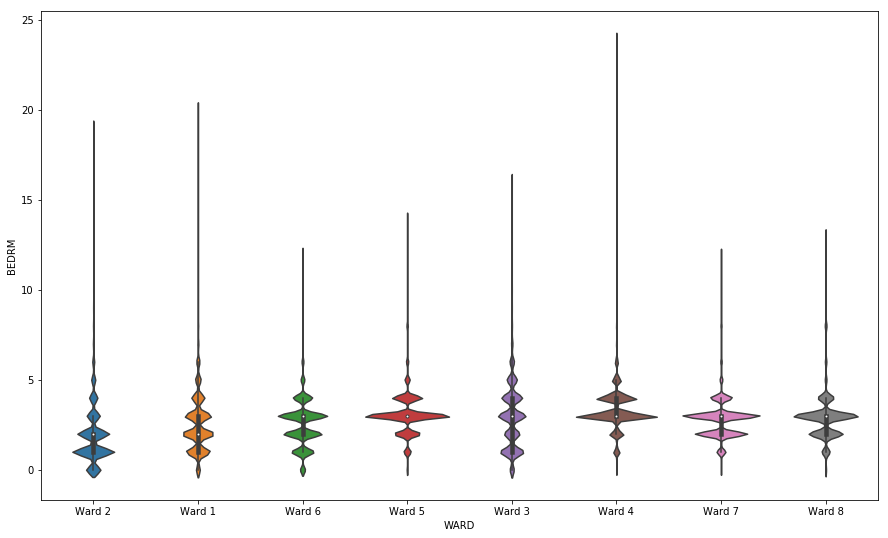

In [123]:
#making a scatterplot of ward and bedrooms...
plt.subplots(figsize=(15,9))
sns.violinplot(x='WARD', y='BEDRM', data=dcl_df)

In [124]:
#plt.subplots(figsize=(15,9))
#sns.violinplot(x='ZIPCODE', y='PRICE', data=dcl_df)

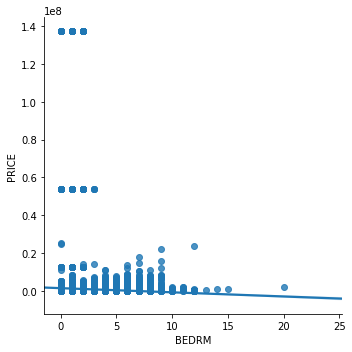

In [125]:
sns.lmplot(x='BEDRM', y='PRICE', data=dcl_df)

<i>According to this, the more bedrooms you have the cheaper they get! Or, as I am more inclined to believe, I have done something horribly horribly wrong.
<p> I have heard that this may be in part due to nearly ~800 entries of 2-bedroom sales happening for $1.37million dollars. Which seems somewhat excessive, to say the least.
</p></i>

In [81]:
#commented out because this is not very useful data and is cluttering
#up my view
#dcl_df.corr()

In [82]:
#What about year remodelled and price? Maybe newere(feature) homes
#are more expensive...
remod = smf.ols('PRICE ~ YR_RMDL + WARD', data=dcl_df).fit()

In [83]:
remod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:01:55   Log-Likelihood:            -1.0057e+06
No. Observations:               57674   AIC:                         2.011e+06
Df Residuals:                   57665   BIC:                         2.011e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.625e+07   4.93e+06    -15.472      0.000   -8.59e+07   -6.66e+07
WARD[T.Ward 2]  1.197e+06   1.36e+05      8.785      0.000     9.3e+05    1.46e+06
WARD[T.Ward 3]  4.281e+06   1.39e+05     30.772      0.000    4.01e+06    4.55e+06
WARD[T.Ward 4] -1.123e+05   1.49e+05     -0.753      0.452   -4.05e+05     1.8e+05
WARD[T.Ward 5] -2.374e+05   1.51e+05     -1.577      0.115   -5.33e+05    5.77e+04
WARD[T.Ward 6]  7.099e+04   1.33e+05      0.532      0.595   -1.91e+05    3.33e+05
WARD[T.Ward 7] -3.181e+05   1.67e+05     -1.909      0.056   -6.45e+05    8437.544
WARD[T.Ward 8] -3.898e+05   1.99e+05     -1.961      0.050   -7.79e+05    -245.772
YR_RMDL         3.834e+04   2460.656     15.580      0.000    3.35e+04    4.32e+04
==============================================================================
Omnibus:                   103980.415   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90565281.824
Skew:                          13.565   Prob(JB):                         0.00
Kurtosis:                     195.227   Cond. No.                     2.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

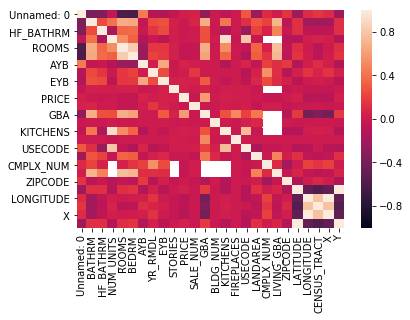

In [84]:
#running all the corr data through a heatmap.
#It is quite fine, and not perhaps that obviously useful
#but it remains interesting in potential
fineheat = dcl_df.corr()

sns.heatmap(fineheat, vmin=-1, annot=False)
#plt.xticks(rotation=10)

<i>Obviously, the number of bathrooms and number of bedrooms is correlated. Larger homes usually have more of each! It appears there is also heavy correlation between longitude and latitude, which makes sense (the homes are not in the exact same spot, when one moves N, S, E, or W, it is likely we move a bit in the another direction as well).
</i>

In [92]:
dcl_df.shape

(158957, 49)

In [91]:
#looking for the standard deviation of price, to graph
#already have the mean, media, mode from Pt.1, but maybe this is
#the more elegant way to devise it?

meanprice = dcl_df['PRICE'].mean()
stdprice = dcl_df['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf = dcl_df.copy() #to not mess up the original df
copydf = copydf.drop(copydf[copydf['PRICE'] > toprange].index)
copydf = copydf.drop(copydf[copydf['PRICE'] < botrange].index)

copydf.shape


(158589, 49)

In [94]:
#on standard deviation PRICE and WARD?
#What about year remodelled and price? Maybe newere(feature) homes
#are more expensive...
#commented out to reduce clutter

#stdev1 = smf.ols('PRICE ~ WARD', data=copydf).fit()
#stdev1.summary()

In [ ]:
#running the standard WARD and PRICE through a heatmap
#It is quite fine, and not perhaps that obviously useful
#but it remains interesting in potential

#no clue how to remove all of the redundant data from a heatmap
#I looked at the seaborn documentation, but there doesn't
#appear to be a chart-level way to do this...and I have to figure out
#which features I am trying to measure by...and how to get the data
#to fit a weird shape...
#PRICE by WARD (corr. in heatmap)hmm....



#wardheat = copydf.corr()   #literally the same as above: useless
 
#sns.heatmap(wardheat, vmin=-1, annot=False)
#plt.xticks(rotation=10)

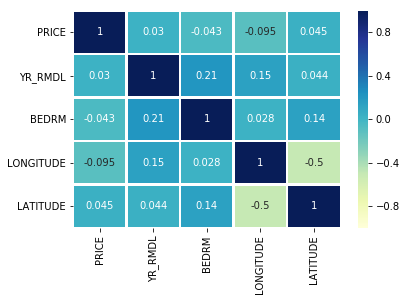

In [153]:
#trying to make a new dataframe to look at WARD and PRICE more rigorously
#here we go:

wardpr = dcl_df[['WARD','PRICE','YR_RMDL','BEDRM','LONGITUDE','LATITUDE']]

warheat = wardpr.corr()

sns.heatmap(warheat, vmin=-1, annot=True, linewidths=1.5, cmap="YlGnBu")

<i>A somewhat basic heatmap, true. But really a quite useful task to learn about. I would imagine introducing more variables would look pretty. But many of these do not seem to be quite so useful. Although we can see that Longitude and Latitude are, again, highly correlated!
</i>